# How customer reviews interact with internal and external factors 
Name: Yifan Zhu 

Student ID: 1006345849

## INTRODUCTION

In the Web 2.0 generation, people interact and collaborate with each other in a virtual community through social media. With Web 2.0 now widespread, platforms such as Yelp, TripAdvisor, and Expedia, which allows users to upload reviews, photos, and other user-generated content (UGC), are commonly used. Understanding the significance of online customer reviews, both the ratings and the comments, as a form of electronic word-of-mouth communication (eWOM), is an important managerial topic.
 
On the one hand, user-generated content in the digital world contains a valuable source of information for customers unfamiliar with the product or service. More than 85% of the customers cite reviews, as a considerable influence on purchase decisions (Pfeffer, 2015) and over 76% of consumers trust online reviews (Nielsen 2015); thus, buying decisions will ultimately be shaped by reviews.Thus, providing customer reviews online represents an essential business strategy to improve product sales (Zhao, Wu, Hua & Fang, 2019). Additionally, for business managers, customer reviews provide a powerful and cost-efficient marketing channel which does not involve a significant advertising budget (Lei, 2016). 
 
There have been a number of longitudinal surveys about customer reviews. By the broad application of text mining approaches, some research has unlocked customer sentiment analysis to explore their overall satisfaction as related to online ratings schemes (Gallagher, Furey & Curran, 2019). Other research has focused on the data, including the number of ratings, the average rating reviews, and the number and length of written comment (Mudambi & Schuff, 2010; Schindler & Bickart, 2012), in order to determine helpfulness of the customer review . What much of this research has ignored is  the effect of external factors such as the climate index on customer reviews. Since weather can change customer buying behaviours (Molla, 2016), it is possible that the number of customer reviews posted will also be influenced by seasonal changes in climate.

The objectives of this study is to determine whether customer review behaviours respond to both internal and external factors. In this project we define internal factors as customer behaviours and business responses (e.g., business’s display rating, location chosen, business status), and external factors as everything that neither customer nor business manager can determine, including seasonal weather changes. The preliminary results of this study aim to extend the previous studies and throw a more comprehensive light on the Voice of Customer (VOC). 

The first project focuses on how internal factors influence customer reviews. We will investigate the correlation and effect of business status, business display stars, location (belonging city) on reviews posted on Yelp.com. The second project extend the previous study and visualizes the effect of business location selection on review numbers plotting in two maps. The third project studies the external factor (climate index), the data is generated through the web-scraping technique, and we will test if external factors do have an impact on customer review numbers. The last part of the project examine each climate variable and its significance by applying four linear regression models. We will test the accuracy of our models and give the suggested model. If the hypothesis holds true and discuss the implication of our findings for giving business responses.


### - Data 

There are three major datasets involved in this study. 
    
To investigate customer reviews, we obtain the Yelp.com customer review data from Kaggle.com. Yelp is an American public company that owns Yelp.com website and Yelp mobile app, publishing crowd-sourced reviews about businesses. The dataset is a subset of Yelp’s business, reviews and user data which contains information about businesses across 11 metropolitan areas in four countries. We download the first two subsets. The subset of business contains 209,393 businesses with 14 variables, which we only keep 9 variables for further usage (business_id, name, city, state, latitude, longitude, stars, review_count, is_open). The subset of reviews contains 1,320,761 observations with 5 variables, which we only keep four variables (user_id, business_id, text, date) and calculate the text length and apply sentiment analysis using the Python package “TextBlob” which assigns positive, neutral or negative to each comment. Since there is no information about display rating of certain businesses in the subset of reviews, we merge these two datasets. 

In order to find whether location plays a role in customer review number, we visualize Toronto’s major roads and buildings on the map. The city’s shape file (2011 Census - Boundary file) is provided by Statistics Canada, and the other two are offered by Canadian Open Data and Free Geospatial Data Resources. 

For the external factors involved in this study, the data of climate factors is generated through HTML-based web-scraping. We obtain the data through this method because there is no data set containing relative information available and the data will be updated by the provider periodically. The selected variables describe the weather condition in Toronto, Canada: monthly rainfall days, monthly average daylight hour, average monthly sunshine hours and average sea temperature.(Source-1: https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration, Source-2: https://www.weather-ca.com/en/canada/toronto-climate#rainfall)


## PROJECT ONE

In [1]:
# PART ONE
# set up
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

# import dataset
import json
import os
print(os.listdir("/Users/yvonne_zhu/Desktop/ECO225/ECO225 Project-1"))

users = []
with open('/Users/yvonne_zhu/Desktop/ECO225/ECO225 Project-1/yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= 209393:
            break
df = pd.DataFrame(users)
# checking missing values in the data set and printing the percentage for missing volues for each columns 
count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,keys = ["count","percentage"])

# drop the missing data
df_clean=df.dropna()
df_business = df_clean.drop(columns=["address","postal_code","hours","attributes"])
df_business.head()
# our cleaned data is ready to be used in the following analysis

['.DS_Store', 'Project One Guidelines.pdf', 'Zhu_YIfan_project1.pdf', 'Yifan_Zhu_project1.html', 'yelp_academic_dataset_business.json']


,business_id,name,city,state,latitude,longitude,stars,review_count,is_open,categories
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,Cornelius,NC,35.462724,-80.852612,3.5,36,1,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh..."
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,North Las Vegas,NV,36.219728,-115.127725,2.5,3,0,"Hardware Stores, Home Services, Building Suppl..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,Mesa,AZ,33.428065,-111.726648,4.5,26,1,"Home Services, Plumbing, Electricians, Handyma..."
5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,Gilbert,AZ,33.350399,-111.827142,4.5,38,1,"Auto Repair, Automotive, Oil Change Stations, ..."
6,oiAlXZPIFm2nBCt0DHLu_Q,Green World Cleaners,Las Vegas,NV,36.063977,-115.241463,3.5,81,1,"Dry Cleaning & Laundry, Local Services, Laundr..."


In [7]:
# import dataset for user's review (original data set)
users = []
with open('/Users/yvonne_zhu/Desktop/ECO225 Final Project_Dec.17/yelp_academic_dataset_tip.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))

df_review = pd.DataFrame(users)
df_review=df_review.dropna()
df_review.head()

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0


In [15]:
# comput the number of user review for each business and merge into a new dataframe
df_review['totalwords'] = df_review['text'].str.split().str.len()
dataframe = pd.merge(df_review,df_business,on="business_id")

dff = dataframe.groupby(["business_id","stars"]).totalwords.sum().reset_index()
dff2 = dataframe.groupby(['business_id','stars'],as_index=False).agg({'user_id': 'count'})
dfff = pd.merge(dff, dff2, on="business_id")
dfff["average"]= dfff['totalwords']/dfff['user_id']
del dfff['stars_y']
dfff = dfff.rename(columns={'stars_x': 'stars', 'user_id': 'users'})

business_review = pd.merge(dfff, df_business,on='business_id')
del business_review['stars_y']
newdf=business_review.rename(columns={'stars_x':'stars'})
newdf.head()

,business_id,stars,totalwords,users,average,name,city,state,latitude,longitude,review_count,is_open,categories
0,--1UhMGODdWsrMastO9DZw,4.0,33,3,11.000000,The Spicy Amigos,Calgary,AB,51.049673,-114.079977,27,1,"Restaurants, Mexican"
1,--6MefnULPED_I942VcFNA,3.0,137,15,9.133333,John's Chinese BBQ Restaurant,Richmond Hill,ON,43.841694,-79.399755,55,1,"Chinese, Restaurants"
2,--7zmmkVg-IMGaXbuVd0SQ,4.0,111,11,10.090909,Primal Brewery,Huntersville,NC,35.437106,-80.843688,65,1,"Breweries, Food"
3,--9e1ONYQuAa-CB_Rrw7Tw,4.0,2100,176,11.931818,Delmonico Steakhouse,Las Vegas,NV,36.123183,-115.169190,1759,1,"Seafood, Cajun/Creole, Restaurants, Steakhouses"
4,--DaPTJW3-tB1vP-PfdTEg,4.0,80,4,20.000000,Sunnyside Grill,Toronto,ON,43.677807,-79.444674,51,1,"Restaurants, Breakfast & Brunch"


### Statistics Summary 
1) The mean of business getting review stars on Yelp is 3.66 with standard deviation of 0.19, which shows the review stars is quite concentrated to the mean value; 2) the total comment word counts of business is around 135 words on average, which maximum 29754 and minimum 1. Since the standard deviation is huge, we can conclude that there is a big difference across businesses; 3) on average, only 12 customers will post a comment on Yelp.com; 4) the number of people who rate the business on Yelp.com is 65 on average, which is almost five times than the number of people leave a comment about their experience.

In [308]:
# show summary table of summary stats
df_summary = newdf.drop(columns=["name","state","latitude","longitude","categories","is_open"])
df_summary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
stars,101102.0,3.624775,0.863525,1.0,3.0,3.500000,4.5,5.0
totalwords,101102.0,134.967755,388.232637,1.0,16.0,42.000000,116.0,29754.0
users,101102.0,11.862149,36.854070,1.0,1.0,3.000000,9.0,3679.0
average,101102.0,12.381458,8.711846,1.0,8.0,10.605662,14.0,107.0
review_count,101102.0,65.963285,171.493446,3.0,10.0,23.000000,60.0,10129.0


The word cloud visualizes the words that appear the most frequently in comments. The bigger the word size is displayed, the more likely the word will show up in the review. For example, “Love”,“Great”, “food”, “great service”, “amazing”, “awesome” are the top 6 words to be expressed. Therefore, most common words are related to customers' positive sentiment.

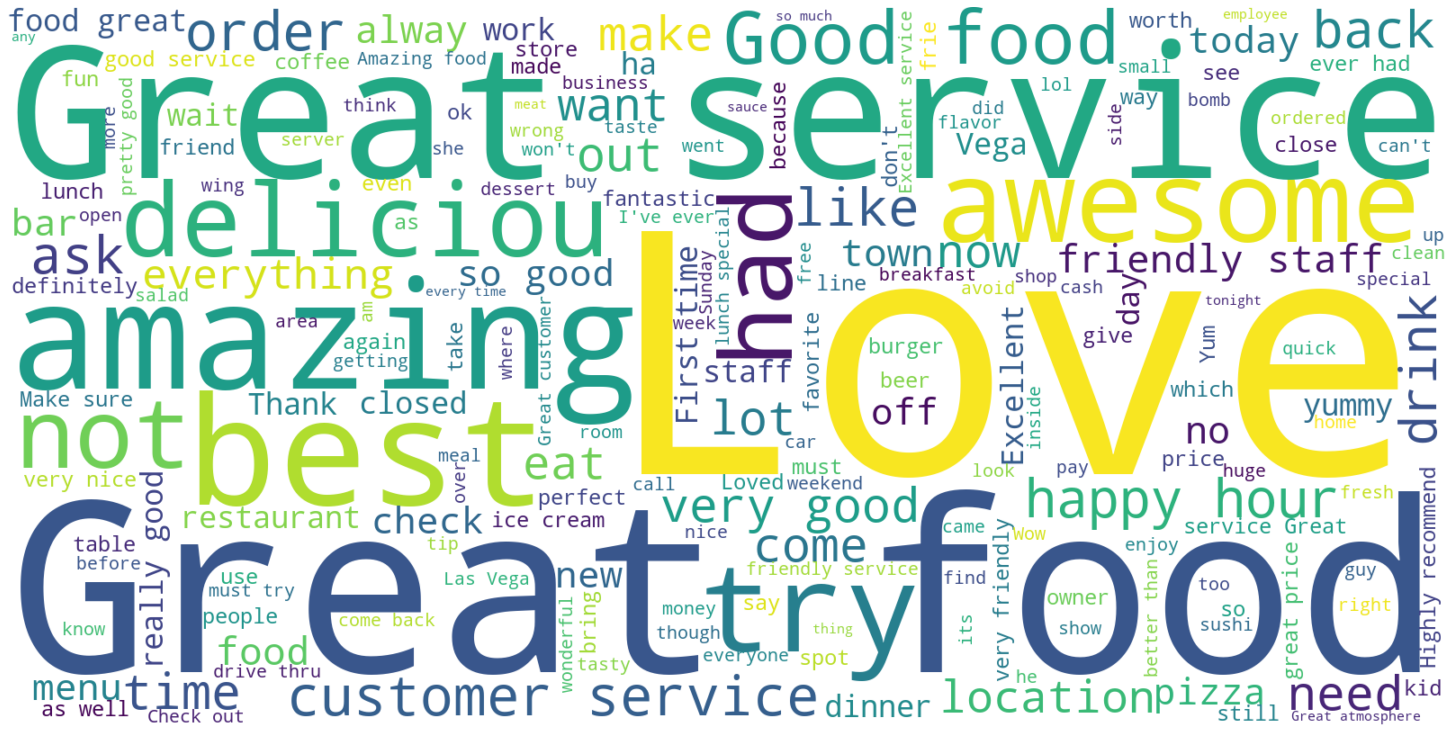

In [129]:
# review text cloud
import re #Regular expression operations
import json
import pandas as pd
# ! pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

# define the vouge words that we want to remove from the analysis
def create_wordcloud(items, stopwords=['a', 'an', 'the', 'and', 'have','you','this','for','is','also','on'
                                       ,'they','but','if','are','when','what','some','all','it','with','that',
                                      'at','in','there','their','here','my','only','from','of','was','are','were',
                                      'place','I','your','around','will','be','to','just','or','get','one','go',
                                      'them','can','we','after','then','u','do','would','me','do','about','by',
                                      'our','us','while','got']):
    '''create the wordcloud object
    args
    items :     the items we need to display
    stopwords : a list of stopwords to filter out tokens
    ''' 
    
    text = ' '.join(items)
    wordcloud = WordCloud(width=1600, 
                          height=800, 
                          margin=0, 
                          stopwords=stopwords,
                          background_color="white"
                         ).generate(text) # optionally we can set max_words=20 
    
    plt.figure( figsize=(20,10)) # set the final figure size
    plt.imshow(wordcloud, interpolation="bilinear") # pass the image and set interpolation type
    plt.axis("off") # turn all axes off 
    plt.tight_layout(pad=0) # no padding
    plt.show() # display plot

# get the text from dataset 
text = df_review["text"]
create_wordcloud(text)

### Analysis Correlations

Customer reviews are the overall judgement of reviewers’ experience of the quality of products or service (Hu et al., 2008). In terms of the cognitive load theory in psychology that people have limited information-processing capacity, consumers are trying to reduce the amount of effort they expend on to carry out decisions (Hu et al., 2014). Businesses listed on Yelp.com have numerical reviewer ratings stars, ranging from 1 to 5 in a discrete scale. Consumers review ratings could be helpful for those who seek to understand other consumers’ experiences, which can be divided into two categories: quality and quantitative. The quality features include the user's sentiment and the frequency of words. Review word length, review numbers are considered as quantitative features. In the following section, we will discuss each features with internal factors, including business status, business rating stars, location. 

### - Review with Business Status

The currently closed business has much fewer reviewers in total compared to opened business. One guessing is that business with bad service or quality will have less loyal customers; thus, earn less and there is no enough profits to keep running their business. 

Text(0.5, 1.0, 'Number of Review with Buisness Status (figure 1.1)')

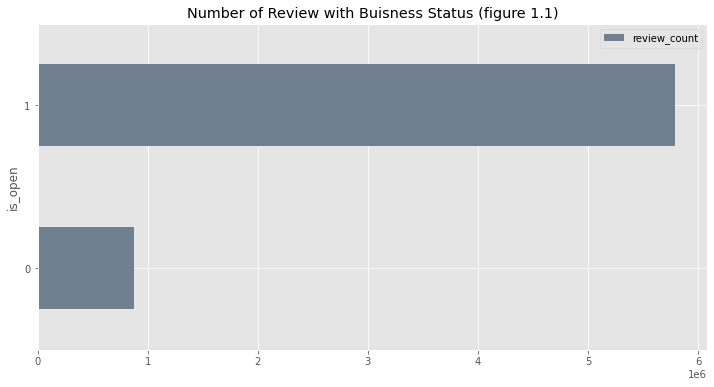

In [192]:
# Top cities by number of business listed 
business = newdf.drop(columns=["name","latitude","longitude","categories"])
business_counts= business.groupby(['is_open']).agg({'review_count': 'sum'})
# Sort by the number of business and plot into bar chart

sub1=business_counts.sort_values(ascending=True, by="review_count")\
.plot(kind='barh', stacked=False, figsize=[12,6], color='slategrey')
plt.title('Number of Review with Buisness Status (figure 1.1)')

### - Review with Location (City)

Location matters. This bar chart shows how many reviews each city's top business will receive on Yelp.com. 49.5 million people visited Las Vegas in 2019, according to the Las Vegas Visitors and Convention Authority. Therefore, no wonder Las Vegas extremely dominates the review count compared to other cities.

Text(0.5, 1.0, " Top 10 city: 5.0 stars business's review count (figure 1.2)")

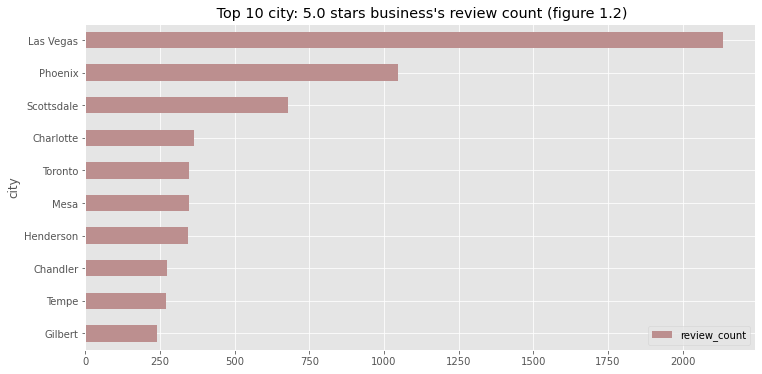

In [198]:
# get the business with stars 5.0
stars5= newdf.loc[business['stars'] == 5.0]
city5 = stars5.drop(columns=['stars'])
city5.head()

# group 5.0 business by its city
business_counts2 = city5[['city', 'review_count']].groupby(['city'])\
['review_count'].agg('count').sort_values(ascending=False)
business_counts2 = pd.DataFrame(data=business_counts2)

# select the top 10 cities and plot the bar chart
city_top_10 = business_counts2.head(10)
sub2=city_top_10.sort_values(ascending=True, by='review_count')\
.plot(kind='barh', stacked=False, figsize=[12,6], color="rosybrown")
plt.title(" Top 10 city: 5.0 stars business's review count (figure 1.2)")

### - Review with Business Rating Stars
- Total Review Number with Review Stars

It is more likely to get a higher star if more people are willing to write reviews of certain business. Among all customer review, most people leave with stars 4.0 followed by 3.5 and 4.5. It is relatively interesting since it is more likely to give high recommendations if customers have a great experience and leave bad comments if they are very unsatisfied. However, our review counts does not lay at these two extremes (see the 'Review Distribution' below).

Text(0.5, 1.0, 'Review Count Distribution (figure 1.3)')

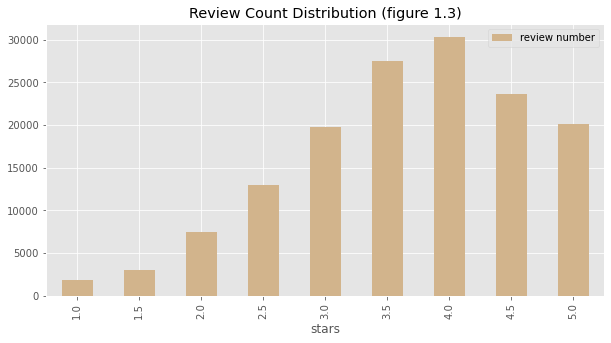

In [201]:
# stars analysis in bar chart and its feature
review_stars_total = df_business.drop(columns=["business_id","name","city",
                                            "state","latitude","longitude","categories","is_open"])

# group by stars and count the total number for each stars
stars_num_total = review_stars_total.groupby("stars").count()
stars_nums_total = stars_num_total.rename(columns={'review_count': 'review number'})
bar_total = stars_nums_total.plot.bar(color="tan", figsize=[10,5])
plt.title("Review Count Distribution (figure 1.3)")

- Average review word count with business rating stars

Figure 1.5: In the quantitative features of customer reviews, review length is a potential indicator of customer satisfaction. Hu et al. (2008) argue that not all reviews have the same impact on customers. The word count for business on Yelp.com is in the range [1, 113] with an average around 10, the distributions only have slight differences across business rating stars; thus, the word length difference is not significant to conclude any influence on customer reviews in this study. Moreover, simply counting words will not lead to a precise conclusion. This is because not all the words are used to deliver influential and meaningful information to the potential customers. 

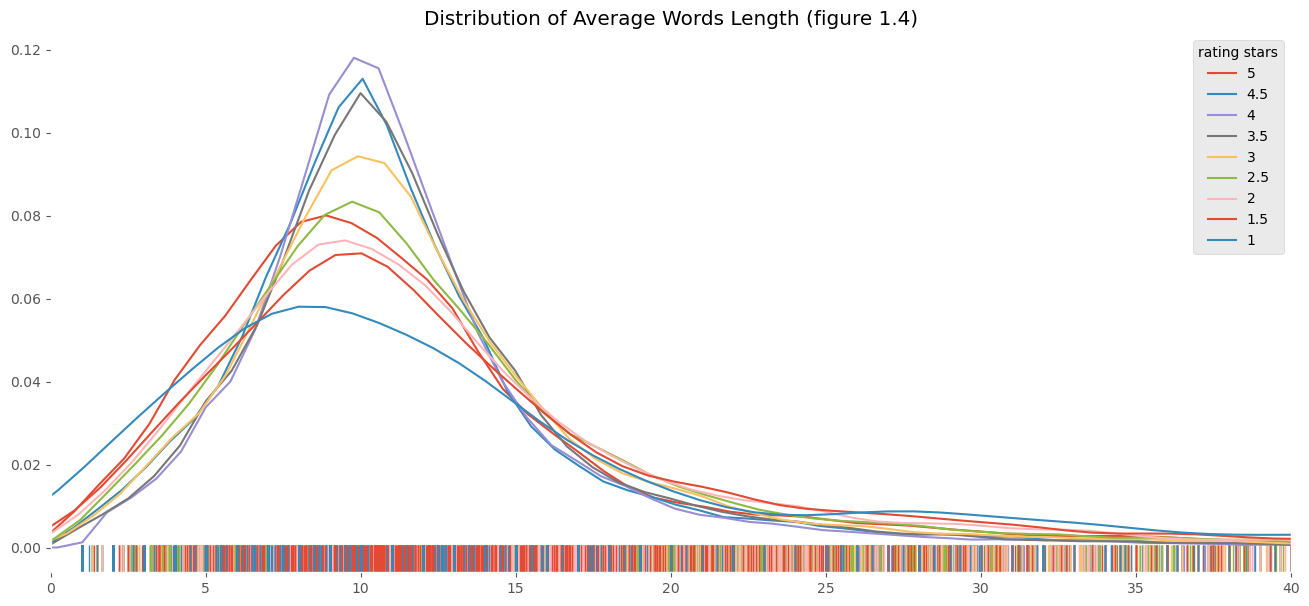

In [366]:
# Sort the dataframe by target
target_0 = newdf.loc[newdf['stars'] == 5]
target_1 = newdf.loc[newdf['stars'] == 4.5]
target_2 = newdf.loc[newdf['stars'] == 4]
target_3 = newdf.loc[newdf['stars'] == 3.5]
target_4 = newdf.loc[newdf['stars'] == 3]
target_5 = newdf.loc[newdf['stars'] == 2.5]
target_6 = newdf.loc[newdf['stars'] == 2]
target_7 = newdf.loc[newdf['stars'] == 1.5]
target_8 = newdf.loc[newdf['stars'] == 1]

# plot multiple lines 
fig, ax = plt.subplots(figsize=(16,7))
sns.distplot(target_0[['average']], hist=False, rug=True,label="5")
sns.distplot(target_1[['average']], hist=False, rug=True,label="4.5")
sns.distplot(target_2[['average']], hist=False, rug=True,label="4")
sns.distplot(target_3[['average']], hist=False, rug=True,label="3.5")
sns.distplot(target_4[['average']], hist=False, rug=True,label="3")
sns.distplot(target_5[['average']], hist=False, rug=True,label="2.5")
sns.distplot(target_6[['average']], hist=False, rug=True,label="2")
sns.distplot(target_7[['average']], hist=False, rug=True,label="1.5")
sns.distplot(target_8[['average']], hist=False, rug=True,label="1")

plt.legend(title='rating stars')
ax.set_xlim(0,40)
ax.set_facecolor('white')
plt.title('Distribution of Average Words Length (figure 1.4)')
plt.show()

- Review Sentiment with Business Stars

Figure 1.5: We are able to perform sentiment analysis by using the TextBlob package in Python. TextBlob calculates sentiment using WordNet Database and produces a polarity score for each sentence. Polarity is in the range of [-1,1] with continuous value, and the closer it is to 1, the more positive the content is. We define the positive polarity score as positive sentiment, zero as neutral, polarity score below zero as negative sentiment. The figure shows the distribution of polarity score, in other words, the distribution of customer sentiment. 

In [203]:
# sentiment analysis 
# ! pip install textblob
from textblob import TextBlob 
mining = pd.merge(df_review, newdf, on="business_id")
keep= mining[['text','date','city','stars']]

# create a function to get the subjectivity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#create a function to get the polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

# create two new columns
keep["subjectivity"] = keep['text'].apply(getsubjectivity)
keep["polarity"] = keep['text'].apply(getpolarity)

# create a function to compute the positive/ neutral/ negative analysis score
def getAnalysis(score):
    if score <0:
        return "negative"
    elif score == 0:
        return "netural"
    else:
        return "positive"
keep['analysis'] = keep['polarity'].apply(getAnalysis)
# prepare for time series analysis, keep only the month in the "date" column
from datetime import datetime as dt
keep['month'] = keep['date'].astype(str).str.split().str[0]
keep['month'] = pd.DatetimeIndex(keep['month']).month
# keep_trt = keep.loc[keep['city'].isin(['Toronto'])]
# keep.head()

,text,date,city,stars,subjectivity,polarity,analysis,month
0,Here for a quick mtg,2013-11-26 18:20:08,Scottsdale,3.5,0.5,0.333333,positive,11
1,Surprised by the inventory! Was looking for a ...,2011-07-25 02:03:06,Scottsdale,3.5,0.9,0.125000,positive,7
2,Thomas train table is a lot of fun!,2012-04-15 16:15:12,Scottsdale,3.5,0.2,0.375000,positive,4
3,Scanning books I want for Lydia and adding the...,2011-10-13 21:35:53,Scottsdale,3.5,0.0,0.000000,netural,10
4,Mockingjay!!,2012-04-11 03:33:53,Scottsdale,3.5,0.0,0.000000,netural,4


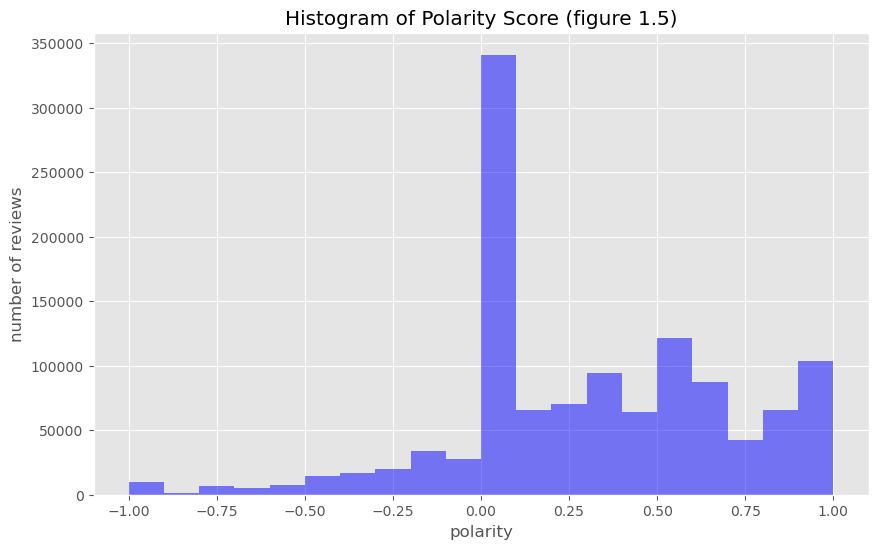

In [367]:
# histogram of Polarity Score, distribution of polarity score for reviews
num_bins = 20
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(keep.polarity,num_bins,facecolor='blue',alpha=0.5)
plt.xlabel('polarity')
plt.ylabel('number of reviews')
plt.title('Histogram of Polarity Score (figure 1.5)')
plt.show()

Figure 1.6: Boxplot is a standardized way of displaying the polarity score, it will tell us how tight the data is in three categories. We find that the mean polarity score is approximately +0.5, 0, -0.25 for positive, neutral, negative sentiment respectively. Additionally,  the positive polarity has wider spread compared to negative sentiment. The positive polarity has wider spread (See figure.2) compared to negative sentiment meaning that unsatisfied people are more likely to have common expressions or patterns. Similarly, if the quality of service or products reach the customer’s expectations or go beyond their expectation, reviewers will convey various kinds of expressions to describe their feelings. In all, customers are more likely to leave a positive comment rather than negative with more colored words to describe their experience.


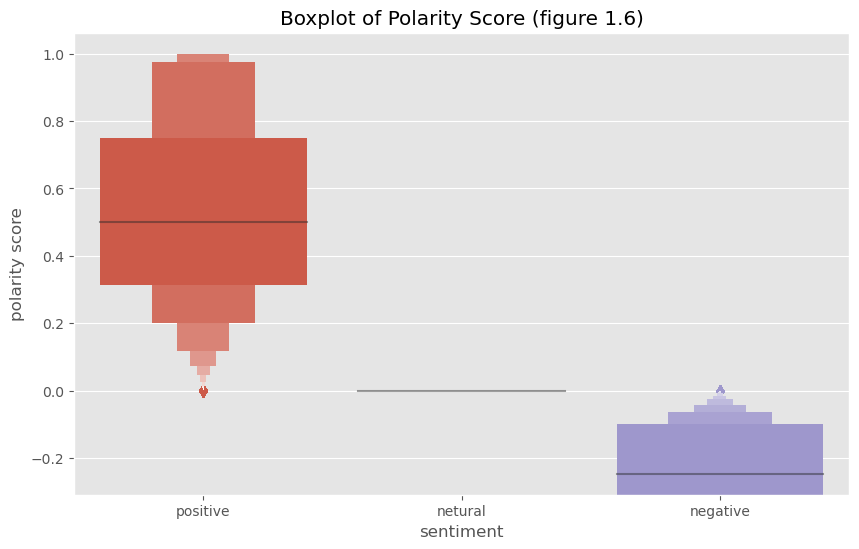

In [368]:
# plot the boxplot of polarity score
plt.figure(figsize=(10,6))
sns.boxenplot(x='analysis',y='polarity',data=keep)
plt.xlabel('sentiment')
plt.ylabel('polarity score')
plt.title('Boxplot of Polarity Score (figure 1.6)')
plt.show()

The output below shows more than half of the total reviews posted on Yelp.com are positive. In the pursuit of understanding what the text really tells and whether comments will attract potential customers, we have to assign a sentiment score categorized as positive, neutral, or negative to each feedback. The percentage of three categories are 63.2%, 24.9% and 11.9% respectively. 

In [206]:
# compute percentage of positive text
keep_trt = keep
ptext = keep_trt[keep_trt.analysis == "positive"]
ptext = ptext['text']
pos = round((ptext.shape[0]/keep_trt.shape[0])*100,1)  

# compute percentage of negative text
ntext = keep_trt[keep_trt.analysis == "negative"]
ntext = ntext['text']
neg = round((ntext.shape[0]/keep_trt.shape[0])*100,1)

# compute percentage of negative text
netext = keep_trt[keep_trt.analysis == "netural"]
netext = netext['text']
ne = round((netext.shape[0]/keep_trt.shape[0])*100,1) 
print(pos,neg,ne)

63.2 11.9 24.9


Figure 1.7: This multiple line plot below interprets the distribution of reviews condition on display rating and sentiment analysis. It is obvious that positive sentiment contributes the largest proportion. The distribution is normally left-skewed, and positive, neutral, negative review numbers all reach the peak at stars 4.0. 

User’s text sentiment distributes similarly within each category based on business rating stars. Although three sentiment review numbers tend to increase as business rating improves, the deviation between the positive and neutral/negative becomes larger and larger under stars 4.0. Each of the sentiments arrives its peak under 4.0 business rating and manifest a convergent tendency when heading stars 4.0. The left-skewed of the distribution  highly matches with the distribution of reviews by rating stars. Furthermore, it is interesting to find that even when business rating is quite low, positive sentiment still has a higher proportion than that for negative one, which indicates that customers are more willing to share a positive experience than negative ones. We can also conclude the number of reviews do not follow the increasing trend as business rating stars increase, if we trust the number of reviews of a restaurant, it might not lead us to the most favorable place recommended by previous customers. Therefore, as a customer seeking an unfamiliar place to visit, we shall consider both the number of reviews and the display rating stars. 

In [207]:
# get percentage of positive and negative text by stars  
df_positive = keep_trt[keep_trt['analysis'] == "positive"]
positive= df_positive.groupby(['stars'],as_index=False).agg({'analysis': 'count'})
analysis = positive.rename(columns={'analysis': 'positive'})
df_negative = keep_trt[keep_trt['analysis'] == "negative"]
negative= df_negative.groupby(['stars'],as_index=False).agg({'analysis': 'count'})
negative = negative.rename(columns={'analysis': 'negative'})
analysis =pd.merge(analysis,negative, on='stars')
df_netural = keep_trt[keep_trt['analysis'] == "netural"]
netural= df_netural.groupby(['stars'],as_index=False).agg({'analysis': 'count'})
netural = netural.rename(columns={'analysis': 'netural'})
analysis =pd.merge(analysis,netural, on='stars')

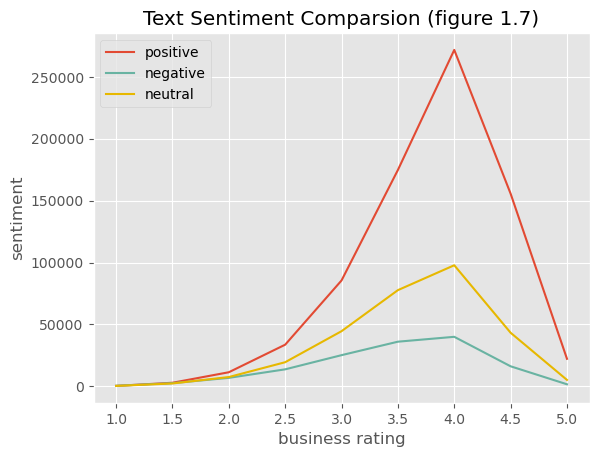

In [369]:
# visualize chunck above with lines
plt.plot(analysis.stars,analysis.positive,label='positive')
plt.plot(analysis.stars,analysis.negative,label='negative',color="#69b3a2")
plt.plot(analysis.stars,analysis.netural,label='neutral',color="#E7B800")
plt.xlabel('business rating')
plt.ylabel('sentiment')
plt.title('Text Sentiment Comparsion (figure 1.7)')
plt.legend()
plt.show()

### - Potential Correlations
After analyzing the original data frame, we find that there are other potential correlations that could be studied in the future. In the correlation matrix below, the closer absolute value is to 1, the stronger evidence there is to show the correlation. For example, review_count and users with latitude, longitude, total words (comment length) is significantly positive correlated.

Text(0.5, 1.0, 'correlation matrix (figure 1.6)')

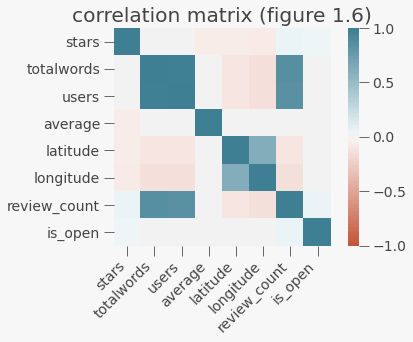

In [57]:
# analysis other correlations
corr = newdf.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title("correlation matrix (figure 1.6)")

## PROJECT TWO
## Section One
### - THE MESSAGE

The objectives of this study is to determine whether customer review behaviours respond to both internal and external factors. In this paper we define internal factors as customer behaviours and business responses (e.g., business’s display rating, location chosen, business status), and external factors as everything that neither customer nor business manager can determine, including seasonal weather changes. In the second project, we will discuss how location factors have an impact on customer review behaviours. Since the importance of location selection is homogeneous across cities, we can clearly take Toronto as an example to illustrate the relationship between location selection and comment numbers.

From the four plots below, we find that cities have similar reviews distribution, which prove our assumption that cities are homogeneous. Thus, we can continue studying Toronto business status.

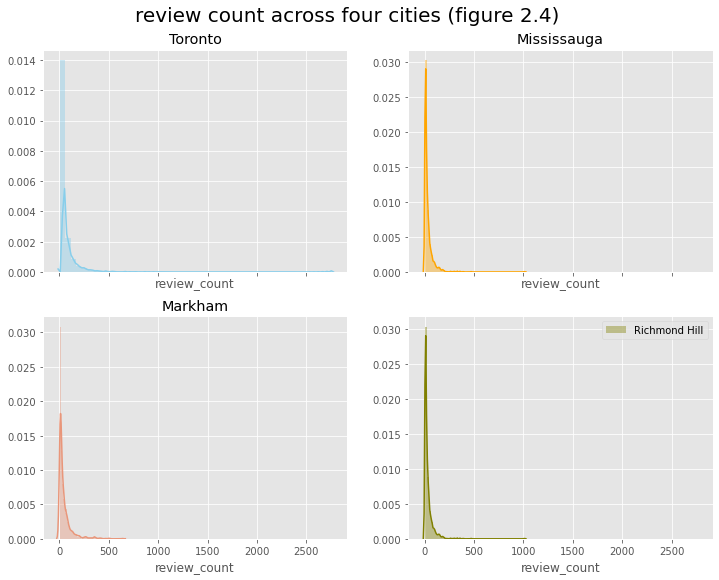

In [205]:
# compare review count for 4 cities with the most business in Ontario
df_ON = newdf[newdf['state']=='ON']
df_trt = df_ON[df_ON['city']=="Toronto"]
df_miss = df_ON[df_ON['city']=="Mississauga"]
df_mark = df_ON[df_ON['city']=="Markham"]
df_rich = df_ON[df_ON['city']=="Richmond Hill"]

f, axes = plt.subplots(2, 2, figsize=(12, 9), sharex=True)
                       
f1 = sns.distplot(df_trt["review_count"] ,color="skyblue", label="Toronto",ax=axes[0,0])
f2 = sns.distplot(df_miss["review_count"] , color="orange", label="Mississauga",ax=axes[0, 1])
f3 = sns.distplot(df_mark["review_count"] , color="darksalmon", label="Markham", ax=axes[1, 0])
f4 = sns.distplot(df_miss["review_count"] , color="olive", label="Richmond Hill",ax=axes[1, 1])
plt.title(label="review count across four cities (figure 2.4)",fontsize=20, x=-0.2,y=2.3)   

f1.title.set_text('Toronto')
f2.title.set_text('Mississauga')
f3.title.set_text('Markham')

plt.legend()
plt.show()

In [10]:
# center my plot
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [384]:
# drop the missing data and create subset for business only in Toronto
df_trt = newdf.loc[newdf['city'].isin(['Toronto'])]

# prepare the coordinates (x,y)
df_trt["Coordinates"]=list(zip(df_trt.longitude, df_trt.latitude))
df_trt["Coordinates"]=df_trt["Coordinates"].apply(Point)

# convert to geo data frame
gdf_trt = gpd.GeoDataFrame(df_trt, geometry="Coordinates")
gdf_trt.head()

,business_id,stars,totalwords,users,average,name,city,state,latitude,longitude,review_count,is_open,categories,Coordinates
4,--DaPTJW3-tB1vP-PfdTEg,4.0,80,4,20.000000,Sunnyside Grill,Toronto,ON,43.677807,-79.444674,51,1,"Restaurants, Breakfast & Brunch",POINT (-79.44467 43.67781)
15,--SrzpvFLwP_YFwB_Cetow,3.5,78,9,8.666667,Keung Kee Restaurant,Toronto,ON,43.806750,-79.288858,43,0,"Restaurants, Chinese",POINT (-79.28886 43.80675)
34,-0CCHBui57tZ_1y_14X-5Q,4.5,10,1,10.000000,Mulberry Bar,Toronto,ON,43.662593,-79.423443,16,1,"Nightlife, Cocktail Bars, Bars",POINT (-79.42344 43.66259)
37,-0DwB6Swi349EKfbBAOF7A,3.5,139,11,12.636364,Qi Natural Foods,Toronto,ON,43.663713,-79.417759,11,0,"Health Markets, Specialty Food, Herbs & Spices...",POINT (-79.41776 43.66371)
62,-113IAvSQ4Nn_Jk7OrrPkg,4.5,96,1,96.000000,Rent-a-Son,Toronto,ON,43.756978,-79.482597,10,1,"Gardeners, Home Cleaning, Movers, Local Servic...",POINT (-79.48260 43.75698)


### - Business in Toronto
Figure 2.1 below shows business in Toronto. It is obvious that the number of business getting 4.0 (2614) is the highest among all groups followed by stars 3.5 (2479) and 3.0 (1694). Those three groups contribute more than half the amount of the listed business on Yelp. According to Wikipedia, the economy of Toronto is the largest contributor to the Canadian economy, at 20% of national GDP, and an important economic hub of the world. Moreover, Scott Beck, President and CEO of Tourism Toronto said "Toronto's visitor economy continues to be an economic engine for the city, and that benefits all of us. This is a sector of Toronto's economy that supports 70,000 jobs and 10,000 new jobs over the past 10 years." The consumption and tourism contribution are relatively high, which further prove that Toronto is a good sample to be studied and represents most of the tourism-oriented or flourishing cities.

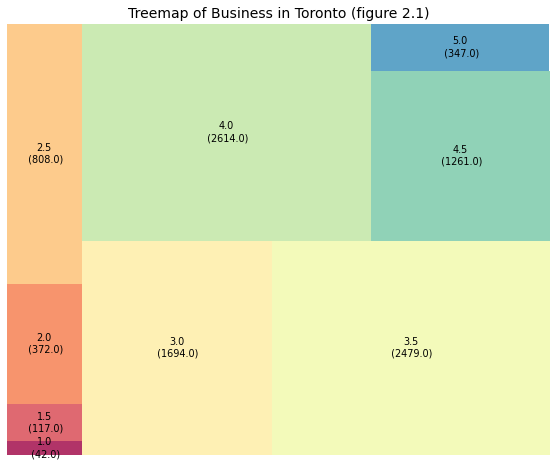

In [309]:
# Treemap of Business in Ontario
# ! pip install squarify 
import squarify
startree= df_trt.groupby('stars').size().reset_index(name='counts')
labels = startree.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = startree['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10,8), dpi= 70)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Business in Toronto (figure 2.1)')
plt.axis('off')
plt.show()

- Different from the project one, jointplot not only shows the relation between review count and rating stars, it also illustrates the distribution of each variable. From the jointplot we can conclude the distribution of rating stars follows a left-shewed normal distribution. Also, except several outliers the review number for each business is mainly concentrated much less than 500.

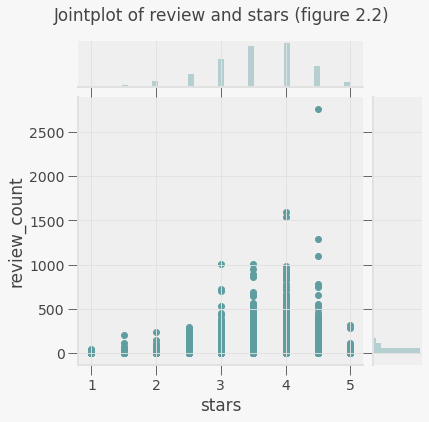

In [68]:
# jointplot stars ~ review
g = sns.jointplot(x='stars',y='review_count',data=df_trt,color="cadetblue")
g.fig.suptitle("Jointplot of review and stars (figure 2.2)")
g.fig.subplots_adjust(top=0.9)

## Section Two: Mapping
### - Business Location: major roads and buildings

In [223]:
# create a subset for 5.0 stars business in Toronto
df_trt.head()
star5= df_trt[df_trt['review_count'] > 100]
trt_5 = stars5.drop(columns=['stars'])
star4= df_trt[df_trt['review_count'] > 300]
trt_4 = star4.drop(columns=['stars'])
trt_5.head()

,business_id,totalwords,users,average,name,city,state,latitude,longitude,review_count,is_open,categories,Coordinates
197,-76didnxGiiMO80BjSpYsQ,250,28,8.928571,Green Beanery,Toronto,ON,43.665030,-79.410954,161,1,"Food, Coffee & Tea",POINT (-79.41095 43.66503)
253,-9dmhyBvepc08KPEHlEM0w,1242,89,13.955056,CN Tower,Toronto,ON,43.642561,-79.387062,765,1,"Public Services & Government, Landmarks & Hist...",POINT (-79.38706 43.64256)
260,-9u2uFwhlj3Yq4mG5IweoA,261,17,15.352941,Hawker Bar,Toronto,ON,43.648281,-79.420383,151,0,"Nightlife, Bars, Australian, Singaporean, Asia...",POINT (-79.42038 43.64828)
308,-BbnAc9YEO6pjvJGEtFbVQ,491,39,12.589744,Sansotei,Toronto,ON,43.666819,-79.385469,268,1,"Noodles, Ramen, Japanese, Restaurants",POINT (-79.38547 43.66682)
478,-ICGmF2qUVKdvOehVNgPbg,327,34,9.617647,Lamesa Filipino Kitchen,Toronto,ON,43.682297,-79.423948,349,1,"Filipino, Restaurants",POINT (-79.42395 43.68230)


The geographic level in the project.2 is the country. The Figure combines Toronto's shape file, major roads and building points (source 1: 2011 Census - Boundary files, Statistics Canada;source 2: Canadian Open Data and Free Geospatial Data Resources). Yellow denotes the major roads, orange denotes buildings, green marked stars denotes business. 

- The business location is always chosen near major roads, which makes customers more convenient
- More business locates in Downtown Toronto, which is a buzzing area filled with skyscrapers, restaurants, nightlife, and an eclectic mix of neighborhoods. 
- Most buildings are surrounded by plenty of business. However, in the top right corner of this map (eastern part of Scarborough), buildings are surrounded by fewer businesses.

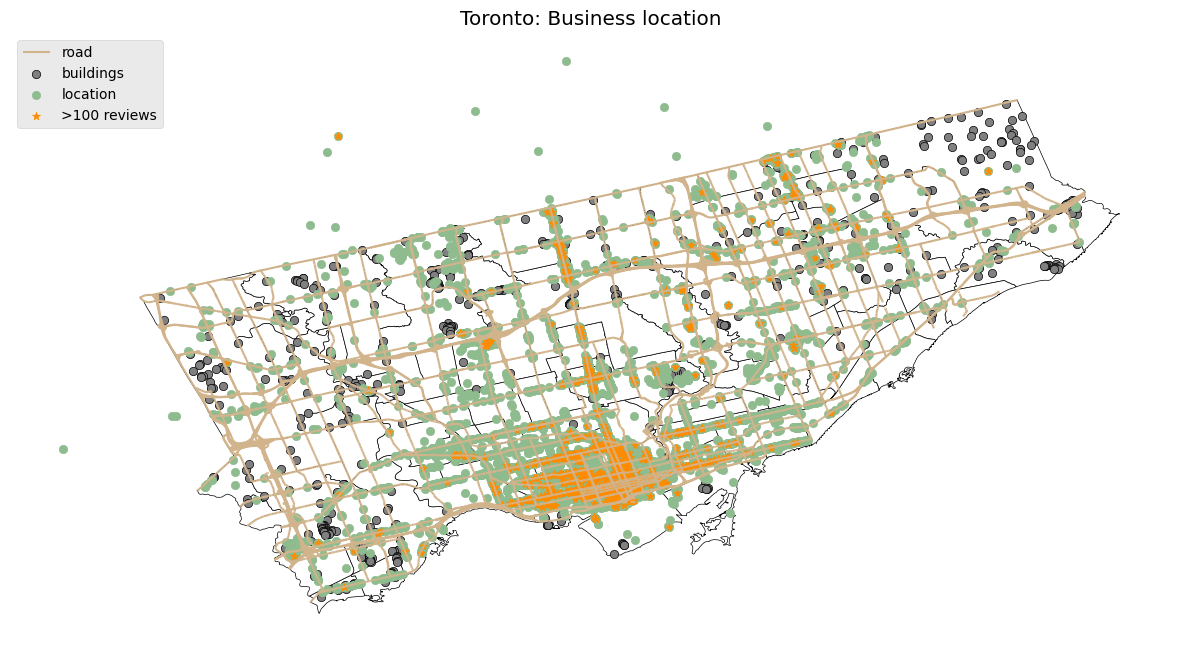

In [304]:
# mapping business in Toronto, major road ~ business ~ building
fig, gax = plt.subplots(figsize=(15,15))

# import Toronto shape file
nb = '/Users/yvonne_zhu/Desktop/ECO225/ECO225 Project-2_Oct_28/Neighbourhoods/Neighbourhoods.shp'
regions = gpd.read_file(nb)
regions['neighbourhood'] = regions['FIELD_7'].str.replace(' \(.+\)', '').str.lower()
regions.plot(ax=gax, edgecolor='black',color='white',legend=True,label='region')

# import major road shape file
majorroad_shapefile = '/Users/yvonne_zhu/Desktop/ECO225/ECO225 Project-2_Oct_28/ONhrd/ONhrd.shp'
roadshp = gpd.read_file(majorroad_shapefile)
roadshp.plot(ax=gax, edgecolor='black',color='tan',legend=True,label='road')

# import building shape file
building_shapefile = '/Users/yvonne_zhu/Desktop/ECO225/ECO225 Project-2_Oct_28/ONbpp/ONbpp.shp'
builshp = gpd.read_file(building_shapefile)
builshp.plot(ax=gax, edgecolor='black',color='grey',legend=True,label='buildings')

# plot all business on the map
gdf_trt = gpd.GeoDataFrame(df_trt,geometry="Coordinates")
gdf_trt.plot(ax=gax, color="darkseagreen", alpha = 1,legend=True,label='location')

# plot the business whose review number exceed 100
gdf_trt_5 = gpd.GeoDataFrame(trt_5,geometry="Coordinates")
gdf_trt_5.plot(ax=gax, color="darkorange", marker='*',alpha = 1,label='>100 reviews',legend=True)

leg = ax.get_legend()
plt.legend()

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Toronto: Business location')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.axis('off')
plt.show()

### - Business Location: where 5-stars business locates in the city

Since the importance of location selection is homogeneous across cities, we can clearly take Toronto as an example to illustrate the relationship between location selection and comment numbers. From the visualization, we find that the business receives comments above 100 are mainly located in downtown, in which the population density is more intense than other areas. The map below shows the location of business obtained over 100 comments and over 300 comments, which further states that location matters. We can conclude that businesses located in places with higher population mobility have a tendency to obtain more customer reviews. The business manager in those places can obtain more feedback to deliver a business response and improve their service or products, which gains competitive advantages. Furthermore, we find the area where the 5.0 stars business located highly coincides, which is the evidence that location will bring the market edge.

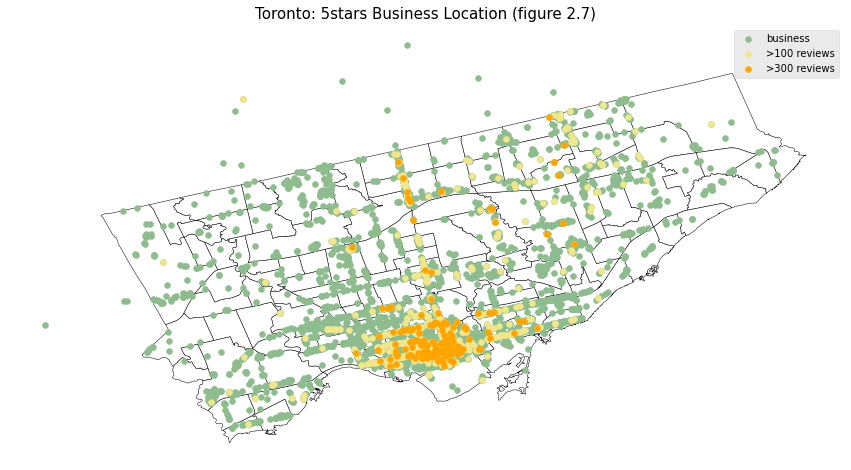

In [231]:
# where the 5 stars business located in Toronto
fig, gax = plt.subplots(figsize=(15,15))
regions.plot(ax=gax, edgecolor='black',color='white')

gdf_trt = gpd.GeoDataFrame(df_trt,geometry="Coordinates")
gdf_trt.plot(ax=gax, color="darkseagreen", alpha = 1,label='business',legend=True)

# plot the business whose review number exceed 100
gdf_trt_5 = gpd.GeoDataFrame(trt_5,geometry="Coordinates")
gdf_trt_5.plot(ax=gax, color="khaki", alpha = 1,label='>100 reviews',legend=True)

# plot the business whose review number exceed 300
gdf_trt_4 = gpd.GeoDataFrame(trt_4,geometry="Coordinates")
gdf_trt_4.plot(ax=gax, color="orange", alpha = 1,label='>300 reviews',legend=True)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Toronto: 5stars Business Location (figure 2.7)',fontsize=15)

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

leg = ax.get_legend()
plt.legend()

plt.axis('off')
plt.show()

# PROJECT THREE 

## Section One 

Is economic activity being influenced by some external factors? The rapid economic growths often benefit from climate, environment, labour supply, technology and many other variables. There have been a number of longitudinal surveys about customer reviews. By the broad application of text mining approaches, some research has unlocked customer sentiment analysis to explore their overall satisfaction as related to online ratings schemes (Gallagher, Furey & Curran, 2019). Other research has focused on the data, including the number of ratings, the average rating reviews, and the number and length of written comment (Mudambi & Schuff, 2010; Schindler & Bickart, 2012), in order to determine helpfulness of the customer review. What much of this research has ignored is  the effect of external factors such as the climate index on customer reviews. Since weather can change customer buying behaviours (Molla, 2016), it is possible that the number of customer reviews posted will also be influenced by seasonal changes in climate.

The data records the date of each comment posted on Yelp. com, and we find that monthly total comment numbers follow the certain pattern. As shown in figure.6 above, May, June, July have the highest review numbers. How can we explain these differences between each month? The apparent variation is climate change. As the previous study discussed in the introduction, weather can change customers' buying behaviour, it is possible that customer review numbers will be influenced as well since they are highly correlated. 

## Section Two 
For the external factors involved in this study, the data of climate factors is generated through HTML-based web-scraping. We obtain the data through this method because there is no data set containing relative information available and the data will be updated by the provider periodically. The selected variables describe the weather condition in Toronto, Canada: average monthly sunshine hours, monthly rainfall days, monthly average daylight hour and average sea temperature. 

- Rain: Toronto average rainy days from Jan 2016 to Nov 2020
- Temperature:  average historical sea temperature in Toronto 
- Daylight:  average daylight hours of a day by month
- Sun hour: average daily sunshine hour in Toronto by month

Source of data: sunshine hours (https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration), other climate variables are scrapped from https://www.weather-ca.com/en/canada/toronto-climate#rainfall. The Web-scraping process is quite successful which does not meet any challenges and there is no need to scrap the web periodically. The potential challenge is the data itself since the report and update period is different meaning that extra effort should be made in order to unify the time period for each variable. 

If we can generate those climates index mentioned above, we can benefit from HTML-based web-scraping and are able to investigate the impact of climate index on customer review numbers. If we can better understand the change in review numbers, business managers can indirectly predict their customers behavior and make some seasonal business responses. Weather change can disrupt the transportation system and put pressure on the supply chain, it will also have an impact on people’s tendency to have outdoors activities. 

The process of web-scraping is explained below by each chunk.
- Step.1 Import library "BeautifulSoup" and request for the web content via request.get()

In [363]:
# web scraping sunshine duration data
# HTML based web-scraping
# import pandas as pd, hided as already imported for the whole project
import requests
from bs4 import BeautifulSoup
wikiurl = "https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration"
table_class = "wikitable sortable jquery-tablesorter"

# get the content by using get()
response = requests.get(wikiurl)
# print(response.status_code) get the result 200, which means we get successful responses

- Step.2 Parsing HTML using Python library bs4 which parses through HTML content and understands the complete structure of the content. The response content can be passed to a BeautifulSoup( ) method to obtain a soup object which looks very structured. The table has its class name, which can be used to search for the web content directly in our soup object with the find_all( ) method

In [365]:
soup = BeautifulSoup(response.text,'html.parser')
indiatable = soup.find('table',{'class': "wikitable"})
all_values = indiatable.find_all('tr') # call all table rows in  indiatable

- Step.3 Create an empty dataframe, and write a loop to go through all the elements of the list in order and extract the country, city, monthly sunshine hour data from the list element which are enclosed in the `<td>` HTML tag. The output dataframe "df_wiki" is the target table from the website. 

In [362]:
# create an empty dataframe
df_wiki = pd.DataFrame(columns = ['Country', 'City', 'Jan','Feb','Mar','Apr',
                                  'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) 
# Initialise index to zero
ix = 0 

for row in all_values[1:]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    Country = values[0].text.rstrip('\n') # use rstrip to remove the "\n" in each row
    City = values[1].text.rstrip('\n')
    Jan = values[2].text.rstrip('\n')
    Feb = values[3].text.rstrip('\n')
    Mar = values[4].text.rstrip('\n')
    Apr = values[5].text.rstrip('\n')
    May = values[6].text.rstrip('\n')
    Jun = values[7].text.rstrip('\n')
    Jul = values[8].text.rstrip('\n')
    Aug = values[9].text.rstrip('\n')
    Sep = values[10].text.rstrip('\n')
    Oct = values[11].text.rstrip('\n')
    Nov = values[12].text.rstrip('\n')
    Dec = values[13].text.rstrip('\n')
    df_wiki.loc[ix] = [Country, City, Jan,Feb,Mar,Apr,
                       May,Jun,Jul,Aug,Sep,Oct,Nov,Dec] 
    # Store it in the dataframe as a row
    ix += 1
    
# Print the first 5 rows of the dataframe
df_wiki.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Ivory Coast,Gagnoa,183.0,180.0,196.0,188.0,181.0,118.0,97.0,80.0,110.0,155.0,171.0,164.0
1,Ivory Coast,Bouaké,242.0,224.0,219.0,194.0,208.0,145.0,104.0,82.0,115.0,170.0,191.0,198.0
2,Ivory Coast,Abidjan,223.0,223.0,239.0,214.0,205.0,128.0,137.0,125.0,139.0,215.0,224.0,224.0
3,Ivory Coast,Odienné,242.0,220.2,217.3,214.7,248.8,221.8,183.5,174.5,185.4,235.8,252.0,242.6
4,Ivory Coast,Ferké,279.0,249.0,253.0,229.0,251.0,221.0,183.0,151.0,173.0,245.0,261.0,262.0


In [341]:
# save the data into csv.file
df_wiki.to_csv("/Users/yvonne_zhu/Desktop/ECO225 Final Project_Dec.17/sunshineduration.csv", 
             sep=',', encoding='utf-8-sig',index =False)

# follow the same logic we can web-scraping for rainfall data and write into csv or excel
# https://www.weather-ca.com/en/canada/toronto-climate#rainfall

In [2]:
# merge the monthly count with external fatcor
# call excel created from the web-scraping section into Jupyter Notebook
dfinal= pd.read_excel ('/Users/yvonne_zhu/Desktop/ECO225 Final Project_Dec.17/external factor.xlsx')
dfinal

,month,review,rain,daylight,sunhour,seatemp
0,1,581,5.4,9.4,85.9,2.8
1,2,499,4.8,10.5,111.3,2.2
2,3,564,7.9,12.0,161.0,1.9
3,4,599,11.2,13.5,180.0,3.5
4,5,584,12.7,14.7,227.7,5.8
5,6,605,11.0,15.4,259.6,14.8
6,7,663,10.4,15.1,279.6,21.4
7,8,645,10.2,13.9,245.6,22.3
8,9,549,11.1,12.5,194.4,20.1
9,10,488,11.7,11.0,154.3,14.1


## Section Three
In this section, we will investigate each variable's impact on customer review numbers. The correlation matrix shows that review number is highly correlated with daylight, sunshine hour, and temperature. 

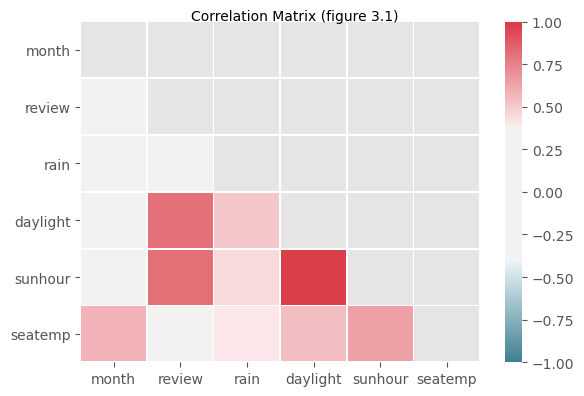

In [325]:
# correlations between variables
corr = dfinal.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation Matrix (figure 3.1)', fontsize=10)

fig.tight_layout()

The data records the date of each comment posted on Yelp.com, and we find that monthly total comment numbers follow the certain pattern as shown in figure below, May, June, July have the highest review numbers. How can we explain these differences between each month? The apparent variation is climate change. As the previous study discussed in the introduction, weather can change customers' buying behaviour, it is possible that customer review numbers will be influenced as well since they are highly correlated. 

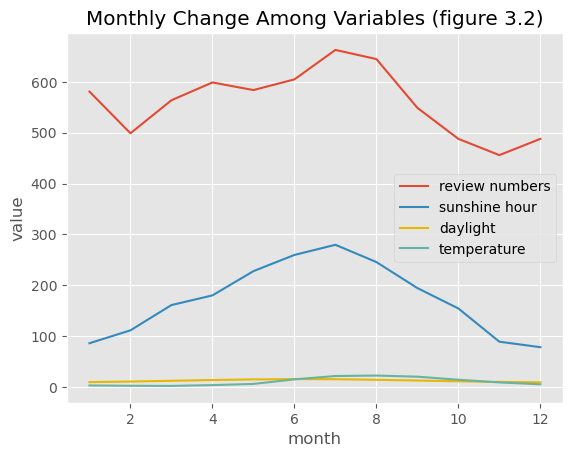

In [326]:
# create monthly trend of review, total sunhour, daylight using multiple line plot
plt.plot(dfinal.month,dfinal.review,label='review numbers')
plt.plot(dfinal.month,dfinal.sunhour,label='sunshine hour')
plt.plot(dfinal.month,dfinal.daylight,label='daylight',color="#E7B800")
plt.plot(dfinal.month,dfinal.seatemp,label='temperature', color="#69b3a2")
plt.xlabel('month')
plt.ylabel('value')
plt.title('Monthly Change Among Variables (figure 3.2)')
plt.legend()
plt.show()

The visualization below shows the relationship between temperature and monthly customer reviews. We can find that higher temperature roughly lead to higher customer review number. This can be explained that people tend to have more outdoor activities during the warm weather, and unwilling to participate outdoors when facing extremely code weather conditions. Therefore, it is the evidence that climate index will determine customer behaviours.

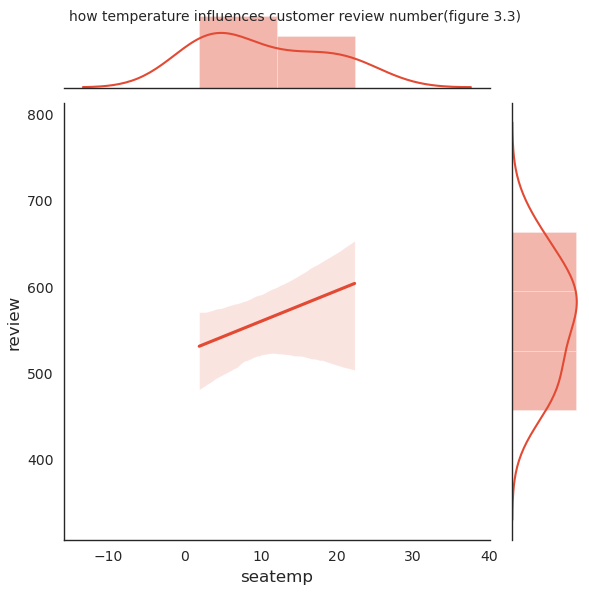

In [329]:
# joint plot of temperature ~ review number
with sns.axes_style('white'):
            p=sns.jointplot("seatemp", "review", data=dfinal, kind='reg')
            p.fig.suptitle("how temperature influences customer review number(figure 3.3)",fontsize=10)
            p.ax_joint.collections[0].set_alpha(0)
            p.fig.tight_layout()

Similarly, figure 3.4 shows the interaction between rainy days and customer review numbers. From the plot below we find that most of the month concentrated around 10-12 days and there is no obvious linear trend between two variables. Therefore, using the prefictor "rainy days" alone cannot explain the response variable well. We need further investigate other variables' interactions with customer review numbers. A linear regression model is therefore suggested.

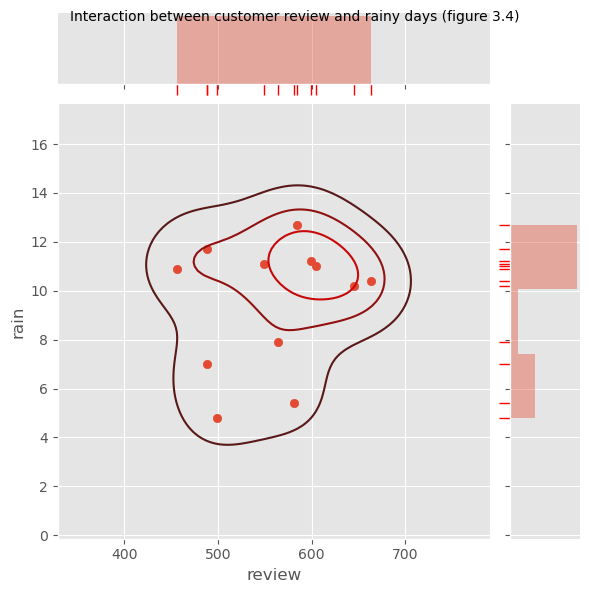

In [331]:
# joint plot  rainy days ~ customer review number
g = sns.jointplot(data=dfinal, x="review", y="rain")
g.plot_joint(sns.kdeplot, color="r", zorder=2, levels=4)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
g.fig.suptitle("Interaction between customer review and rainy days (figure 3.4)",fontsize=10)    
g.fig.tight_layout()

# Final Project

###  OLS Regression

In the given business dataset, the meaning of column 'review_count' is vogue which the provider does not explain whether it reprensents the number of people who rate this business or the number of people who write a comment for this business. Therefore, to improve the accuracy, in project one, I defined the number of user who review the business in text as dependent variable Y and focused on the relation of Y with independent variable such as location, business rating stars, the number of people who review this business, current business status. The relationship with location and business status are non-line while the number of review with rated stars and the number of reviewers are linear. However, these variables could not be enough to explain the fluctuation of customer reviews. 

The data records the date of each comment posted on Yelp. com and we find that monthly total comment numbers follow the certain pattern. As shown in the figure above, May, June, July have the highest review numbers. How can we explain these differences between each month? The apparent variation is climate change. As the previous study discussed in the introduction, weather can change customers' buying behaviour, it is possible that customer review numbers will be influenced as well since they are highly correlated. 

If we can better understand the change in review numbers, business managers can indirectly predict their customers behaviour and make some seasonal business responses. Weather change can disrupt the transportation system and put pressure on the supply chain, it will also have an impact on people’s tendency to have outdoors activities. Seasonal climate changes include sunshine hours, daylight hours, snow fall, rainfall, temperature and other indexes. In order to test this hypothesis, we apply a multiple linear regression. If we prove that monthly change in weather would significantly determine the customer review numbers, for business managers it is not wise to compare review numbers by month as the external factor does not hold the same for each month. Instead, they should compare on a year-on-year basis. 

Therefore, we add more explainatory variables representing climate factors for the following linear regression:

- Y : customer review numbers
- Rain: Toronto average rainy days from Jan 2016 to Nov 2020
- Temperature:  average historical sea temperature in Toronto 
- Daylight:  average daylight hours of a day by month
- Sun hour: average daily sunshine hour in Toronto by month



In [312]:
#  merge the monthly count with external fatcor
# call excel created from the web-scraping section into Jupyter Notebook
# this is the dataset to run the regression model
dfinal= pd.read_excel ('/Users/yvonne_zhu/Desktop/ECO225 Final Project_Dec.17/external factor.xlsx')

### - Regression Model

We can check if the relation between our independent variables and dependent variables are liner via scatter plot. The scatter plot and regression line below is an example of visualizing the regression results. We find the positive linear trend between temperature and review numbers, which matches with the regression output above. We can apply the same logic to other variables like rain, sunhour, daylight as well. Therefore, we can begin with fitting a ordinary linear regression model. 

Text(0.5, 1.0, 'Scatter Plot and Regression Line: Review ~ Temperature (figure 3.5)')

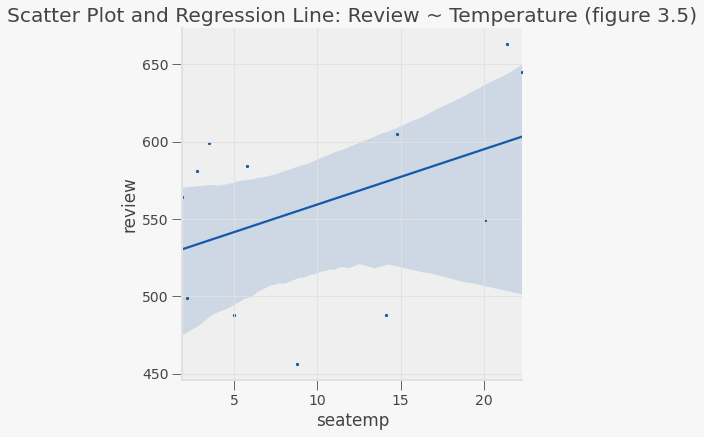

In [5]:
# scatter plot of one model as an example
# plot the regression outcome and scatter together
# should add a title
sns.lmplot(
    data=dfinal, x="seatemp", y="review", height=6,
    scatter_kws=dict(s=5, alpha=1))
ax = plt.gca()
ax.set_title("Scatter Plot and Regression Line: Review ~ Temperature (figure 3.5)")

In [136]:
# apply regression: Y=number of review ~ temp + snow + rain + sunshinehour + over10
# !pip install linearmodels
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

We start with the simple model with only one variable, and extend the model by adding new variables. We will test  and compare their abilities of explaining the dependent variable Y in the following section. There are four linear models in this study. We first have the regression on rainfall and temperature respectively to see how these two variables are good predictors to explain the review number. The third model uses daylight and sunshine hours, since they represent the same climate index except the fact that sun hour is cumulative for one month while the daylight is the average daylight hour in one month. The fourth model consists of all variables which is called the full model. The regression model and estimated coefficients are listed below:

model-1: $
\ {Y}_i = {\beta}_0 + {\beta}_1\ {rain}_i $

model-2: $\ {Y}_i = {\beta}_0 + {\beta}_1\ {temperature}_i$

model-3: $
\ {Y}_i = {\beta}_0  + {\beta}_1\ {daylight}_i + {\beta}_2\ {sunhour}_i
$

model-4: $
\ {Y}_i = {\beta}_0 + {\beta}_1\ {daylight}_i + {\beta}_2\ {rain}_i + {\beta}_3\ {temperature}_i $


In [382]:
dfinal['const'] = 1
# full model reviews ~ snowfall+density+gdp+sunshinehour+clear_days
# Create lists of variables to be used in each regression
X1 = ['const', 'rain'] 
X2 = ['const', 'seatemp']
X3 = ['const', 'daylight','sunhour']
X4 = ['const', 'daylight', 'rain','seatemp']# the best fit

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(dfinal['review'], dfinal[X1], missing='drop').fit()
reg2 = sm.OLS(dfinal['review'], dfinal[X2], missing='drop').fit()
reg3 = sm.OLS(dfinal['review'], dfinal[X3], missing='drop').fit()
reg4 = sm.OLS(dfinal['review'], dfinal[X4], missing='drop').fit()

From the regression output below, we find that in model 1 it seems like rainy days have a positive effect on customer review while model 4 shows the opposite result. In model 4, the estimated coefficient of variable rain is negative. Hence, we should compare AIC, BIC and R square adjusted to choose the model which explains the relationship best. We find that the model 4 has the maximum R-squared adjusted and minimum AIC, BIC compared to others. The p-values in model 4 are 0.002 (daylight), 0.060 (rain), 0.445 (temperature). Since in statistics inference p-value illustrate the significance of each variable, therefore, we can conclude that daylight hour is the most influential variable to the number of reviews which also has the largest coefficient. 

result-1:  $
\ {Y}_i =  506.4311 +  5.6328 \ {rain}_i $

result-2: $ \ {Y}_i=523.5972 + 3.5683\ {temperature}_i$

result-3: $
\ {Y}_i = 393.2752 + 5.7533\ {daylight}_i +  0.5602 \ {sunhour}_i
$

result-4: $
\ {Y}_i = 311.6335 + 29.0484\ {daylight}_i - 12.6923\ {rain}_i + 1.3914\ {temperature}_i $

To evaluate the accuracy of each model, the table below compare their AIC, BIC, R^2 adjusted. AIC, BIC are good means for model selection, the smaller the AIC or BIC the better the model. The difference between AIC and BIC is the penalty, which BIC has more strict penalty and prefers fewer number of predictors. R^2 adjusted is used to illustrate how much information has been explained using the model. Our preferred model should have to minimize AIC and BIC while having the maximum R^2 adjusted. In the table, model4 has the lowest AIC and BIC with the highest R^2 adjusted. As a result, we prefer model4 over others.

In [383]:
results_table = summary_col(results=[reg1,reg2,reg3,reg4],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const','rain','seatemp','sunhour','daylight'])

results_table.add_title('Table - OLS Regressions')

print(results_table)

                      Table - OLS Regressions
                       Model 1     Model 2    Model 3     Model 4  
-------------------------------------------------------------------
const                506.4311*** 523.5972*** 393.2752** 311.6335***
                     (76.9701)   (30.1846)   (167.9933) (64.3709)  
rain                 5.6328                             -12.6923*  
                     (7.8203)                           (5.8104)   
seatemp                          3.5683                 1.3914     
                                 (2.3729)               (1.7309)   
sunhour                                      0.5602                
                                             (0.7827)              
daylight                                     5.7533     29.0484*** 
                                             (24.1785)  (6.5089)   
R-squared            -0.0457     0.1029      0.5676     0.6787     
                     0.0493      0.1844      0.6462     0.7663     
No

### - Machine Learning Model

The regression results starting from the root node, we compare the value and go to the next nodes and the tree will tell which subset we should look at. The regression tree below starts with splitting the variable "daylight", if daylight hour is less than 13, we then investigate if temperature is less and equal to 3.9 or rainy days is less and equal to 10.7. For example, if daylight is less than 13, temperature is less than 3.9, and rainy days less than 5.1, the customer review number will arrive at 499 per month. The objective function is written below:

$$
min \frac{1}{n} \sum_{i=1}^n (Y_i - {\beta}_1\ {daylight}_i - {\beta}_2\ {rain}_i - {\beta}_3\ {temperature}_i)^2 + (regularization)
$$


Text(0.5, 1.0, 'Regression Tree (figure 3.6)')

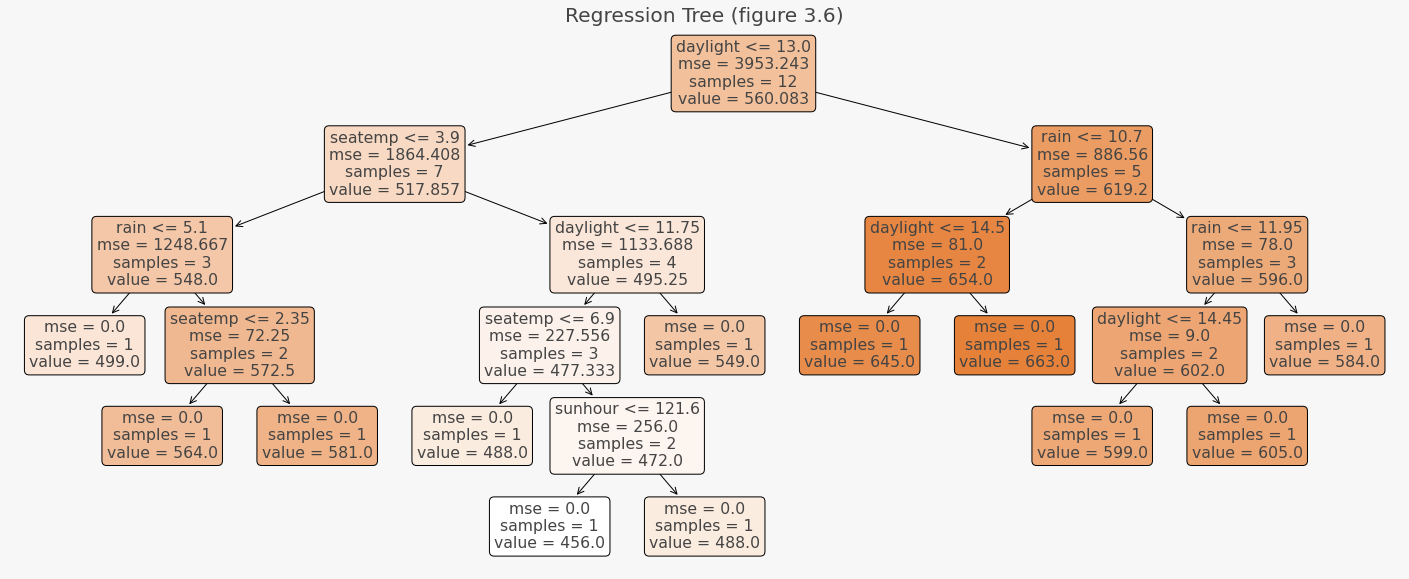

In [6]:
# machine learning model 
from sklearn import tree
from sklearn.tree import plot_tree

#train the classifier (decision tree) with the training data
# set month data as factors

data_feature_names = ['rain','daylight','sunhour','seatemp']
X = dfinal[['rain','daylight','sunhour','seatemp']]
y = dfinal.review
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

# visualize the tree
plt.figure(figsize=(25,10))
a = plot_tree(clf,filled=True,feature_names=data_feature_names,rounded=True)
plt.title('Regression Tree (figure 3.6)')

The regression result shows the MSE (mean squared error), which meassures the average squared difference between the estimated values and the actual value. We find that as we splitting more varibles, the MSE is relatively getting smaller. 

The regression result has a big difference compared with previous model4. This is because the regression tree can naturally handle categorical features and nonlinear classifier. Linear regression is a linear model, which means it works well when the variables have the linear shape. However, when data has a non-linear trend, the decision tree can capture the non-linearity. For example, using variance inflation factors, we find there exists multicollinearity in the linear model that need to transform the data or if find the error term is non-constant in the normal error linear model, we should think about using regression tree.

In an ordinary regression model, we commonly use the least square method, minimizing the sum of squared vertical distance between true value and its predicted value (called residual sum of square in Statistics). In decision tree, however, we literally just find a cut-pints in the independent variables that split the data in a way that offers the best prediction. If we want to apple a regression on variables such as business stars or location (city), it is better using a regression tree. Since in this study, we are dealing with climate indexes, which is not categorical, ordinary linear regression is preferred.

# Conclusion
This study is aimed to investigate if both internal and external factors will influence the online customer review numbers. This research question is answered throughout the analysis of findings above. The preliminary findings of this paper will throw a more comprehensive light on the Voice of Customer (VOC). This section starts with summarizing the main findings and how the study will contribute to the industry. 

Customers are more willing to share their positive experience online across all levels of business ratings. It is not astonishing that the total number of positive reviews exceed the number of negative reviews, but it is surprising to find that positive sentiments dominate even for businesses under 3.0 stars. Also, contrary to expectations derived from previous research, this study does not find a significant difference of word length among different business ratings that businesses are centralized among 10 words on average. Simply using word length to analyse customer reviews is not precise, we should classify meaningful words as not all words have the same influence. 

For quantitative features, we find the customer review number is highly associated with location. The places located in the area with intense population, road, and buildings are more likely to receive reviews. Those businesses gain a competitive advantage and can make business responses more frequently to improve their service or products.  As for businesses that do not benefit from location selection, they should ask customers to leave a comment since more than half of the customer is willing to share their experience if asked to. 

Furthermore, we capture the monthly trend in customer review numbers in our dataset, which could be explained by external factors such as climate index. The impact of climate change on customer reviews has been ignored by most of the researchers. After constructing the multiple linear regression model, we are able to examine that weather will influence the customer's behaviour. We find that rainy days, sunshine hours, daylight hour, temperature are good explanatory variables, and “daylight hour” is the most influential factor to customer review numbers. Some of the issues emerging from this finding relates specifically to business managers and online platforms like Yelp.com. Businesses should change their supply accordingly each month to meet the cost-efficient goal. In addition, business managers and online review platforms like Yelp.com should compare user’s data on a year-on-year basis instead of month-on-month ratio.  	

The limitation of this study is the potential missing data in the dataset. Throughout the analysis, there are only 15 businesses in New York City which makes us doubt the accuracy of data itself. The incomplete dataset makes it hard to put a generalized conclusion. Taking only one city as an example is another weakness of our study. It is because taking one example into consideration may appear to be coincident. If the city does not have climate change over the year, we cannot capture the influence of external factors in this study. A further study is therefore suggested if given a complete data set. We should then test if the external factor (climate index) has a significant impact on monthly review numbers. 


# Reference 
Raffaele, F. (2015). What makes online reviews helpful? A diagnosticity-adoption framework to explain informational and normative influences in e-wom. Journal of Business Research,68(6), 1261-1270. Retrieved July 14, 2015, from http://myaccess.library.utoronto.ca/login?qurl=https://www.proquest.com/scholarly-journals/what-makes-online-reviews-helpful-diagnosticity/docview/1695994568/se-2?accountid=14771

Nielson, A. C. (2015). Trust in Advertising: A Global Nielsen Consumer Report. Nielsen Media Research, New York.

Zhao, P., Wu, J., Hua, Z., & Fang, S. (2019). Finding eWOM customers from customer reviews. Industrial Management & Data Systems, 119(1), 129-147. doi:http://dx.doi.org.myaccess.library.utoronto.ca/10.1108/IMDS-09-2017-0418

Lei, Y. (2016). Essays on internet economics: Customer reviews, advertising, and technology adoption (Order No. 10147132). Available from ABI/INFORM Collection; ProQuest Dissertations & Theses Global. (1830471461). Retrieved from http://myaccess.library.utoronto.ca/login?qurl=https%3A%2F%2Fwww.proquest.com%2Fdissertations-theses%2Fessays-on-internet-economics-customer-reviews%2Fdocview%2F1830471461%2Fse-2%3Faccountid%3D14771

Gallagher, C., Furey, E., & Curran, K. (2019). The application of sentiment analysis and text analytics to customer experience reviews to understand what customers are really saying. International Journal of Data Warehousing and Mining, 15(4), 21. doi:http://dx.doi.org.myaccess.library.utoronto.ca/10.4018/IJDWM.2019100102

Mudambi, S. M., & Schuff, D. (2010). WHAT MAKES A HELPFUL ONLINE REVIEW? A STUDY OF CUSTOMER REVIEWS ON AMAZON.COM. MIS Quarterly, 34(1), 185. Retrieved from http://myaccess.library.utoronto.ca/login?qurl=https%3A%2F%2Fwww.proquest.com%2Fscholarly-journals%2Fwhat-makes-helpful-online-review-study-customer%2Fdocview%2F218125174%2Fse-2%3Faccountid%3D14771

Gallagher, C., Furey, E., & Curran, K. (2019). The application of sentiment analysis and text analytics to customer experience reviews to understand what customers are really saying. International Journal of Data Warehousing and Mining, 15(4), 21. doi:http://dx.doi.org.myaccess.library.utoronto.ca/10.4018/IJDWM.2019100102

Schindler, R. M., & Bickart, B. (2012). Perceived helpfulness of online consumer reviews: The role of message content and style. Journal of Consumer Behaviour, 11(3), 234-243. doi:http://dx.doi.org.myaccess.library.utoronto.ca/10.1002/cb.1372

Molla, M. T. I. (2016). Impact of weather on U.S. apparel retail and wholesale sales (Order No. 11015324). Available from ProQuest Dissertations & Theses Global. (2164864608). Retrieved from http://myaccess.library.utoronto.ca/login?qurl=https%3A%2F%2Fwww.proquest.com%2Fdissertations-theses%2Fimpact-weather-on-u-s-apparel-retail-wholesale%2Fdocview%2F2164864608%2Fse-2%3Faccountid%3D14771

Hu, N., Liu, L., & Zhang, J. J. (2008). Do online reviews affect product sales? the role of reviewer characteristics and temporal effects. Information Technology and Management, 9(3), 201-214. doi:http://dx.doi.org.myaccess.library.utoronto.ca/10.1007/s10799-008-0041-2

Hu, N., Koh, N. S., & Reddy, S. K. (2014). Ratings lead you to the product, reviews help you clinch it? the mediating role of online review sentiments on product sales. Decision Support Systems, 57, 42. Retrieved from http://myaccess.library.utoronto.ca/login?qurl=https%3A%2F%2Fwww.proquest.com%2Fscholarly-journals%2Fratings-lead-you-product-reviews-help-clinch%2Fdocview%2F1490672367%2Fse-2%3Faccountid%3D14771

Bernazzani, S. (2020, July 8). 15 Strategies to Promote Positive Customer Reviews for Your Brand or Business. Retrieved December 14, 2020, from https://blog.hubspot.com/service/get-customer-reviews

Census geography. (2019, November 13). Retrieved from https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2011-eng.cfm

Wildin, H., Jeezy, Y., Marsack, D., Morellato, M., Hickey, C., Alvaro, . . . Tac. (2020, November 21). Canadian Open Data and Free Geospatial Data. Retrieved from https://canadiangis.com/data.php

List of cities by sunshine duration. (2020, November 29). Retrieved from https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration

D.o.o., Y. M. (n.d.). Toronto, Canada - Detailed climate information and monthly weather forecast. Retrieved from https://www.weather-ca.com/en/canada/toronto-climate#rainfall

Yelp, I. (2020, March 26). Yelp Dataset. Retrieved December 18, 2020, from https://www.kaggle.com/yelp-dataset/yelp-dataset